# Contents

- 1. Load and explore example
- 2. Check and run simulation
- 3. Plotting results
- 4. Breakdown: looking at simulation level packages first
    - 4(a). Temporal Discretization (TDIS) Package
    - 4(b). Iterative Model Solution (IMS)
- 5. Breakdown: now to look at model level packages
    - 5(a). Structured Discretization (DIS)
    - 5(b). Node Property Flow (NPF) Package
    - 5(c). Initial Conditions (IC) Package
    - 5(d). Constant-Head (CHD) Package
    - 5(e). Drain (DRN) Package
    - 5(f). Well (WEL) Package
    - 5(g). Recharge (RCH) Package
    - 5(h). Output Control (OC)

In [1]:
from pathlib import Path

import flopy as fp
import matplotlib.pyplot as plt

# 1. Load and explore example

In [2]:
workspace = Path("C:\\Users\\buckl\\Documents\\Software\\mf6.4.1\\examples\\ex-gwf-twri01")
sim_name = "ex-gwf-twri01"
sim = fp.mf6.MFSimulation.load(
    sim_name=sim_name,
    version="mf6",
    exe_name="C:\\Users\\buckl\\Documents\\Software\\mf6.4.1\\bin\\mf6.exe",
    sim_ws=workspace    
)
sim

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package npf...
    loading package ic...
    loading package chd...
    loading package drn...
    loading package wel...
    loading package rch...
    loading package oc...
  loading solution package ex-gwf-twri01...


sim_name = ex-gwf-twri01
sim_path = C:\Users\buckl\Documents\Software\mf6.4.1\examples\ex-gwf-twri01
exe_name = C:\Users\buckl\Documents\Software\mf6.4.1\bin\mf6.exe

###################
Package mfsim.nam
###################

package_name = mfsim.nam
filename = mfsim.nam
package_type = nam
model_or_simulation_package = simulation
simulation_name = ex-gwf-twri01


###################
Package ex-gwf-twri01.tdis
###################

package_name = ex-gwf-twri01.tdis
filename = ex-gwf-twri01.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = ex-gwf-twri01


###################
Package ex-gwf-twri01
###################

package_name = ex-gwf-twri01
filename = ex-gwf-twri01.ims
package_type = ims
model_or_simulation_package = simulation
simulation_name = ex-gwf-twri01


@@@@@@@@@@@@@@@@@@@@
Model ex-gwf-twri01
@@@@@@@@@@@@@@@@@@@@

name = ex-gwf-twri01
model_type = gwf6
version = mf6
model_relative_path = 

###################
Package dis
###################


In [3]:
sim.model_names

['ex-gwf-twri01']

In [4]:
model = sim.model_dict['ex-gwf-twri01']
model

name = ex-gwf-twri01
model_type = gwf6
version = mf6
model_relative_path = 

###################
Package dis
###################

package_name = dis
filename = ex-gwf-twri01.dis
package_type = dis
model_or_simulation_package = model
model_name = ex-gwf-twri01


###################
Package npf
###################

package_name = npf
filename = ex-gwf-twri01.npf
package_type = npf
model_or_simulation_package = model
model_name = ex-gwf-twri01


###################
Package ic
###################

package_name = ic
filename = ex-gwf-twri01.ic
package_type = ic
model_or_simulation_package = model
model_name = ex-gwf-twri01


###################
Package chd_0
###################

package_name = chd_0
filename = ex-gwf-twri01.chd
package_type = chd
model_or_simulation_package = model
model_name = ex-gwf-twri01


###################
Package drn_0
###################

package_name = drn_0
filename = ex-gwf-twri01.drn
package_type = drn
model_or_simulation_package = model
model_name = ex-gwf-twr

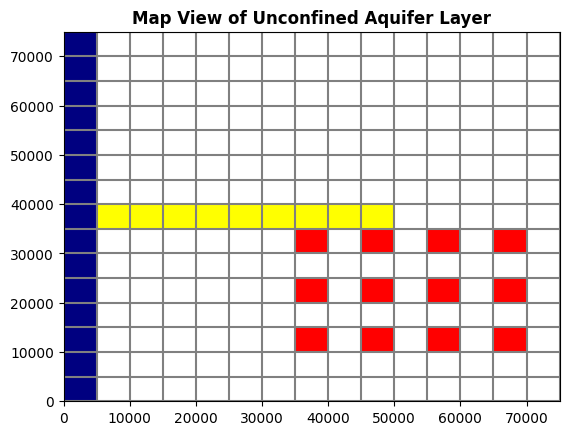

In [42]:
fig, ax = plt.subplots()
ax.set_title("Map View of Unconfined Aquifer Layer", fontweight="bold")
mapview = fp.plot.PlotMapView(model=model, ax=ax)
mapview.plot_ibound()
mapview.plot_grid()

chd_bc = mapview.plot_bc("CHD")
drn_bc = mapview.plot_bc("DRN")
wel_bc = mapview.plot_bc("WEL")

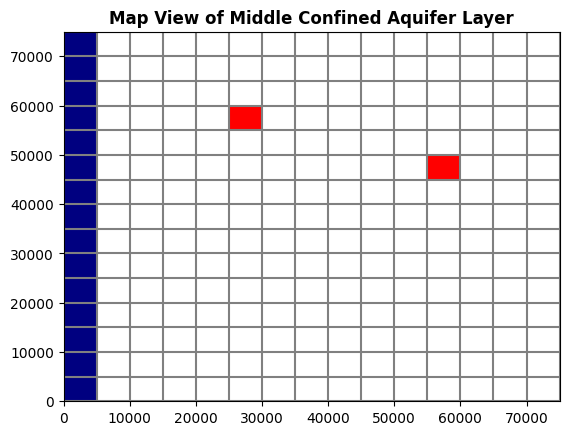

In [6]:
fig, ax = plt.subplots()
ax.set_title("Map View of Middle Confined Aquifer Layer", fontweight="bold")
mapview = fp.plot.PlotMapView(model=model, ax=ax, layer=2)
mapview.plot_ibound()
mapview.plot_grid()

chd_bc = mapview.plot_bc("CHD")
drn_bc = mapview.plot_bc("DRN")
wel_bc = mapview.plot_bc("WEL")

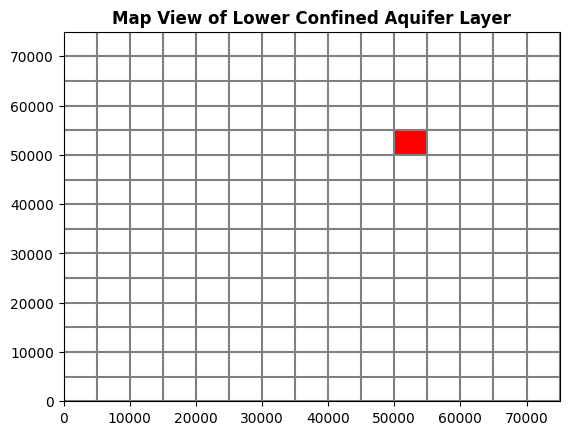

In [7]:
fig, ax = plt.subplots()
ax.set_title("Map View of Lower Confined Aquifer Layer", fontweight="bold")
mapview = fp.plot.PlotMapView(model=model, ax=ax, layer=4)
mapview.plot_ibound()
mapview.plot_grid()

chd_bc = mapview.plot_bc("CHD")
drn_bc = mapview.plot_bc("DRN")
wel_bc = mapview.plot_bc("WEL")

# 2. Check and run simulation

In [8]:
sim.check()

Checking model "ex-gwf-twri01"...

ex-gwf-twri01 MODEL DATA VALIDATION SUMMARY:
  No errors or warnings encountered.

  Checks that passed:
    npf package: zero or negative horizontal hydraulic conductivity values
    npf package: vertical hydraulic conductivity values below checker threshold of 1e-11
    npf package: vertical hydraulic conductivity values above checker threshold of 100000.0
    npf package: horizontal hydraulic conductivity values below checker threshold of 1e-11
    npf package: horizontal hydraulic conductivity values above checker threshold of 100000.0
    chd_0 package: BC indices valid
    chd_0 package: not a number (Nan) entries
    chd_0 package: BC in inactive cells
    drn_0 package: BC indices valid
    drn_0 package: not a number (Nan) entries
    drn_0 package: BC in inactive cells
    wel_0 package: BC indices valid
    wel_0 package: not a number (Nan) entries
    wel_0 package: BC in inactive cells

Checking for missing simulation packages...


In [9]:
success, buff = sim.run_simulation()
assert success, "MODFLOW did not terminate normally!"

FloPy is using the following executable to run the model: ..\..\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                        VERSION 6.4.1 Release 12/09/2022

   MODFLOW 6 compiled Dec 09 2022 18:18:37 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government s

# 3. Plotting results

In [10]:
hds = fp.utils.binaryfile.HeadFile(Path(workspace, "ex-gwf-twri01.hds"))
head_data = hds.get_data()
head_data.shape

(5, 15, 15)

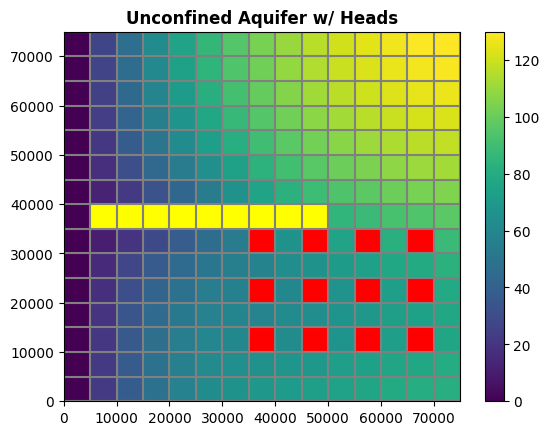

In [11]:
fig, ax = plt.subplots()
ax.set_title("Unconfined Aquifer w/ Heads", fontweight="bold")
mapview = fp.plot.PlotMapView(model=model, ax=ax)
mapview.plot_ibound()
mapview.plot_grid()

head_filled = mapview.plot_array(head_data)
plt.colorbar(head_filled)

# chd_bc = mapview.plot_bc("CHD")
drn_bc = mapview.plot_bc("DRN")
wel_bc = mapview.plot_bc("WEL")

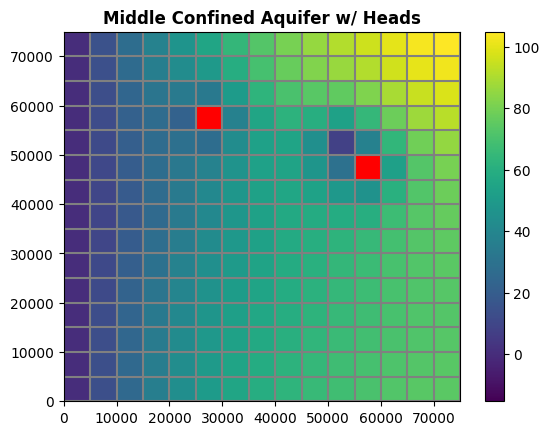

In [12]:
fig, ax = plt.subplots()
ax.set_title("Middle Confined Aquifer w/ Heads", fontweight="bold")
mapview = fp.plot.PlotMapView(model=model, ax=ax, layer=2)
mapview.plot_ibound()
mapview.plot_grid()

head_filled = mapview.plot_array(head_data)
plt.colorbar(head_filled)

# chd_bc = mapview.plot_bc("CHD")
drn_bc = mapview.plot_bc("DRN")
wel_bc = mapview.plot_bc("WEL")

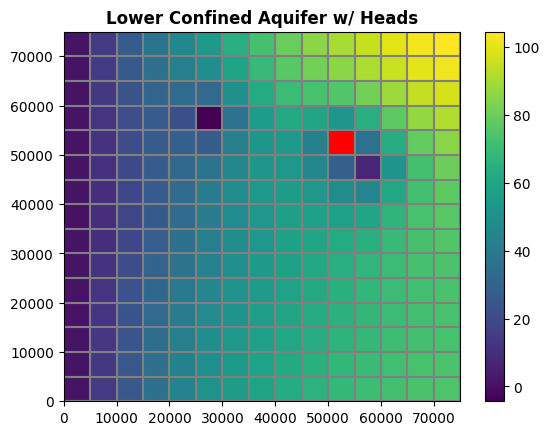

In [13]:
fig, ax = plt.subplots()
ax.set_title("Lower Confined Aquifer w/ Heads", fontweight="bold")
mapview = fp.plot.PlotMapView(model=model, ax=ax, layer=4)
mapview.plot_ibound()
mapview.plot_grid()

head_filled = mapview.plot_array(head_data)
plt.colorbar(head_filled)

# chd_bc = mapview.plot_bc("CHD")
drn_bc = mapview.plot_bc("DRN")
wel_bc = mapview.plot_bc("WEL")

# 4. Breakdown: looking at simulation level packages first
That is, packages for which `model_or_simulation_package = simulation`

In [14]:
# 'nam' package handled by MFSimulation
sim.package_type_dict.keys()

dict_keys(['nam', 'tdis', 'ims'])

### 4(a). [Temporal Discretization (TDIS) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mftdis.html)

In [15]:
sim.package_type_dict['tdis'][0].__class__

flopy.mf6.modflow.mftdis.ModflowTdis

In [16]:
sim.package_type_dict['tdis'][0]

package_name = ex-gwf-twri01.tdis
filename = ex-gwf-twri01.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = ex-gwf-twri01

Block options
--------------------
time_units
{internal}
('seconds')


Block dimensions
--------------------
nper
{internal}
(1)


Block perioddata
--------------------
perioddata
{internal}
(rec.array([(86400., 1, 1.)],
          dtype=[('perlen', '<f8'), ('nstp', '<i4'), ('tsmult', '<f8')]))



#### Reverse-engineer class summary!

```python
time_units = "seconds"
# number of stress periods for the simulation
nper = 1
# perlen (double): length of a stress period
# nstp (int): number of time steps in a stress period
# tsmult (double): multiplier for the length of successive time steps
perioddata = [(86400.0, 1, 1.0)]
filename = "ex-gwf-twri01.tdis"
pname = "ex-gwf-twri01.tdis"
```

### 4(b). [Iterative Model Solution (IMS)](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfims.html)

In [17]:
sim.package_type_dict['ims'][0].__class__

flopy.mf6.modflow.mfims.ModflowIms

In [18]:
sim.package_type_dict['ims'][0]

package_name = ex-gwf-twri01
filename = ex-gwf-twri01.ims
package_type = ims
model_or_simulation_package = simulation
simulation_name = ex-gwf-twri01

Block nonlinear
--------------------
outer_dvclose
{internal}
(1e-09)

outer_maximum
{internal}
(50)


Block linear
--------------------
inner_maximum
{internal}
(100)

inner_dvclose
{internal}
(1e-09)

rcloserecord
{internal}
(rec.array([('inner_rclose', 1.e-06, 'strict')],
          dtype=[('inner_rclose_label', 'O'), ('inner_rclose', '<f8'), ('rclose_option', 'O')]))



#### Reverse-engineer class summary!

```python
# dependent-variable change criterion for convergence of the outer (nonlinear) iterations
outer_dvclose = 1e-09
# maximum number of outer (nonlinear) iterations
outer_maximum = 50
# maximum number of inner (linear) iterations
inner_maximum = 100
# dependent-variable change criterion for convergenceof the inner (linear) iterations
inner_dvclose = 1e-09
# inner_rclose: flow residual tolerance for convergence of the IMS linear solver
# rclose_option: specific flow residual criterion used
rcloserecord = [1e-06, 'strict'] # check this

filename = "ex-gwf-twri01.ims"
pname = "ex-gwf-twri01"
```

# 5. Breakdown: now to look at model level packages
Packages for which `model_or_simulation_package = model`

In [19]:
model.package_names

['dis', 'npf', 'ic', 'chd_0', 'drn_0', 'wel_0', 'rcha_0', 'oc']

### 5(a). [Structured Discretization (DIS)](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfdis.html)

In [20]:
model.package_dict['dis'].__class__

flopy.mf6.modflow.mfgwfdis.ModflowGwfdis

In [21]:
model.package_dict['dis']

package_name = dis
filename = ex-gwf-twri01.dis
package_type = dis
model_or_simulation_package = model
model_name = ex-gwf-twri01

Block options
--------------------
length_units
{internal}
('feet')


Block dimensions
--------------------
nlay
{internal}
(5)

nrow
{internal}
(15)

ncol
{internal}
(15)


Block griddata
--------------------
delr
{constant 5000.0}

delc
{constant 5000.0}

top
{constant 200.0}

botm
Layer_1{constant -150.0}
Layer_2{constant -200.0}
Layer_3{constant -300.0}
Layer_4{constant -350.0}
Layer_5{constant -450.0}



#### Reverse-engineer, what parameters created this...
```python
length_units="FEET"
nlay = 5
nrow = 15
ncol = 15
# column spacing in the row direction
delr = 5000.0
# row spacing in the column direction
delc = 5000.0
# top elevation for each cell in the top model layer
top = 200.0
botm = [
    # bottom of unconfined aquifer
    -150.0,
    # bottom of first confining unit
    -200.0,
    # bottom of middle confined aquifer
    -300.0,
    # bottom of second confining unit
    -350.0,
    # bottom of lower confined aquifer
    -450.0
]
filename = "ex-gwf-twri01.dis"
pname = "dis"
```

### 5(b). [Node Property Flow (NPF) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfnpf.html)

In [22]:
model.package_dict['npf'].__class__

flopy.mf6.modflow.mfgwfnpf.ModflowGwfnpf

In [23]:
model.package_dict['npf']

package_name = npf
filename = ex-gwf-twri01.npf
package_type = npf
model_or_simulation_package = model
model_name = ex-gwf-twri01

Block options
--------------------
cvoptions
{internal}
([(True, 'DEWATERED')])

perched
{internal}
(True)

save_specific_discharge
{internal}
(True)


Block griddata
--------------------
icelltype
Layer_1{constant 1}
Layer_2{constant 0}
Layer_3{constant 0}
Layer_4{constant 0}
Layer_5{constant 0}

k
Layer_1{constant 0.001}
Layer_2{constant 1e-08}
Layer_3{constant 0.0001}
Layer_4{constant 5e-07}
Layer_5{constant 0.0002}

k33
Layer_1{constant 0.001}
Layer_2{constant 1e-08}
Layer_3{constant 0.0001}
Layer_4{constant 5e-07}
Layer_5{constant 0.0002}



#### Reverse-engineer class summary!

```python
cvoptions = [(True, 'DEWATERED')] # check this, docs say this should be string

# when a cell is overlying a dewatered convertible cell, the head difference
# used in Darcy's Law is equal to the head in the overlying cell minus
# the bottom elevation of the overlying cell
perched = True
save_specific_discharge = True
icelltype = [
    # first layer: saturated thickness varies with computed head when
    # head is below the cell top
    # (this makes sense, first layer is unconfined)
    1,
    # remaining: saturated thickness is held constant
    0, 0, 0, 0
]
# (horizontal) hydraulic conductivity
k = [
    # unconfined aquifer
    0.001,
    # first confining unit
    1e-08,
    # middle confined aquifer
    0.0001,
    # second confining unit
    5e-07,
    # lower confined aquifer
    0.0002
]
# (vertical) hydraulic conductivity
k33 = [
    # unconfined aquifer
    0.001,
    # first confining unit
    1e-08,
    # middle confined aquifer
    0.0001,
    # second confining unit
    5e-07,
    # lower confined aquifer
    0.0002
]
filename = "ex-gwf-twri01.npf"
pname = "npf"
```

### 5(c). [Initial Conditions (IC) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfic.html)

In [24]:
model.package_dict['ic'].__class__

flopy.mf6.modflow.mfgwfic.ModflowGwfic

In [25]:
model.package_dict['ic']

package_name = ic
filename = ex-gwf-twri01.ic
package_type = ic
model_or_simulation_package = model
model_name = ex-gwf-twri01

Block griddata
--------------------
strt
{constant 0.0}



#### This one is pretty simple...

```python
# initial (starting) head
strt = 0.0
filename = "ex-gwf-twri01.ic"
pname = "ic"
```

### 5(d). [Constant-Head (CHD) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfchd.html)

In [26]:
model.package_dict['chd_0'].__class__

flopy.mf6.modflow.mfgwfchd.ModflowGwfchd

In [27]:
model.package_dict['chd_0']

package_name = chd_0
filename = ex-gwf-twri01.chd
package_type = chd
model_or_simulation_package = model
model_name = ex-gwf-twri01

Block dimensions
--------------------
maxbound
{internal}
(30)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001E53A5A3E50>}


In [28]:
# constant head data for first (and only) stress period
model.package_dict['chd_0'].stress_period_data.get_data(key=0)

rec.array([((0, 0, 0), 0.), ((0, 1, 0), 0.), ((0, 2, 0), 0.),
           ((0, 3, 0), 0.), ((0, 4, 0), 0.), ((0, 5, 0), 0.),
           ((0, 6, 0), 0.), ((0, 7, 0), 0.), ((0, 8, 0), 0.),
           ((0, 9, 0), 0.), ((0, 10, 0), 0.), ((0, 11, 0), 0.),
           ((0, 12, 0), 0.), ((0, 13, 0), 0.), ((0, 14, 0), 0.),
           ((2, 0, 0), 0.), ((2, 1, 0), 0.), ((2, 2, 0), 0.),
           ((2, 3, 0), 0.), ((2, 4, 0), 0.), ((2, 5, 0), 0.),
           ((2, 6, 0), 0.), ((2, 7, 0), 0.), ((2, 8, 0), 0.),
           ((2, 9, 0), 0.), ((2, 10, 0), 0.), ((2, 11, 0), 0.),
           ((2, 12, 0), 0.), ((2, 13, 0), 0.), ((2, 14, 0), 0.)],
          dtype=[('cellid', 'O'), ('head', '<f8')])

#### Reverse-engineer class summary (and data)!

```python
# maximum number of constant-head cells that will be specified for use
# during any stress period
maxbound = 30
# cellid = (layer, row, column)
# head = 0
stress_period_data = [
    # first column of unconfined aquifer
    ((0, 0, 0), 0.), ((0, 1, 0), 0.), ((0, 2, 0), 0.),
    ((0, 3, 0), 0.), ((0, 4, 0), 0.), ((0, 5, 0), 0.),
    ((0, 6, 0), 0.), ((0, 7, 0), 0.), ((0, 8, 0), 0.),
    ((0, 9, 0), 0.), ((0, 10, 0), 0.), ((0, 11, 0), 0.),
    ((0, 12, 0), 0.), ((0, 13, 0), 0.), ((0, 14, 0), 0.),
    # first column of middle confined aquifer
    ((2, 0, 0), 0.), ((2, 1, 0), 0.), ((2, 2, 0), 0.),
    ((2, 3, 0), 0.), ((2, 4, 0), 0.), ((2, 5, 0), 0.),
    ((2, 6, 0), 0.), ((2, 7, 0), 0.), ((2, 8, 0), 0.),
    ((2, 9, 0), 0.), ((2, 10, 0), 0.), ((2, 11, 0), 0.),
    ((2, 12, 0), 0.), ((2, 13, 0), 0.), ((2, 14, 0), 0.)
]
filename = "ex-gwf-twri01.chd"
pname = "chd_0"
```

### 5(e). [Drain (DRN) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfdrn.html)

In [29]:
model.package_dict['drn_0'].__class__

flopy.mf6.modflow.mfgwfdrn.ModflowGwfdrn

In [30]:
model.package_dict['drn_0']

package_name = drn_0
filename = ex-gwf-twri01.drn
package_type = drn
model_or_simulation_package = model
model_name = ex-gwf-twri01

Block dimensions
--------------------
maxbound
{internal}
(9)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001E53A69EC50>}


In [31]:
model.package_dict['drn_0'].stress_period_data.get_data(key=0)

rec.array([((0, 7, 1),   0., 1.), ((0, 7, 2),   0., 1.),
           ((0, 7, 3),  10., 1.), ((0, 7, 4),  20., 1.),
           ((0, 7, 5),  30., 1.), ((0, 7, 6),  50., 1.),
           ((0, 7, 7),  70., 1.), ((0, 7, 8),  90., 1.),
           ((0, 7, 9), 100., 1.)],
          dtype=[('cellid', 'O'), ('elev', '<f8'), ('cond', '<f8')])

#### Reverse-engineer class summary (and data)!

```python
# maximum number of drain cells that will be specified for use during any stress period
maxbound = 9
# cellid: (layer, row, column)
# elev: elevation of the drain
# cond: hydraulic conductance of the interface between the aquifer and the drain
stress_period_data = [
    # eighth row, second through tenth columns
    # (represents buried drain tubes in first layer)
    ((0, 7, 1),   0., 1.), ((0, 7, 2),   0., 1.),
    ((0, 7, 3),  10., 1.), ((0, 7, 4),  20., 1.),
    ((0, 7, 5),  30., 1.), ((0, 7, 6),  50., 1.),
    ((0, 7, 7),  70., 1.), ((0, 7, 8),  90., 1.),
    ((0, 7, 9), 100., 1.)
]
filename = "ex-gwf-twri01.drn"
pname = "drn_0"
```

### 5(f). [Well (WEL) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfwel.html)

In [32]:
model.package_dict['wel_0'].__class__

flopy.mf6.modflow.mfgwfwel.ModflowGwfwel

In [33]:
model.package_dict['wel_0']

package_name = wel_0
filename = ex-gwf-twri01.wel
package_type = wel
model_or_simulation_package = model
model_name = ex-gwf-twri01

Block dimensions
--------------------
maxbound
{internal}
(15)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001E53A6AF810>}


In [34]:
model.package_dict['wel_0'].stress_period_data.get_data(key=0)

rec.array([((4, 4, 10), -5.), ((2, 3, 5), -5.), ((2, 5, 11), -5.),
           ((0, 8, 7), -5.), ((0, 8, 9), -5.), ((0, 8, 11), -5.),
           ((0, 8, 13), -5.), ((0, 10, 7), -5.), ((0, 10, 9), -5.),
           ((0, 10, 11), -5.), ((0, 10, 13), -5.), ((0, 12, 7), -5.),
           ((0, 12, 9), -5.), ((0, 12, 11), -5.), ((0, 12, 13), -5.)],
          dtype=[('cellid', 'O'), ('q', '<f8')])

#### Reverse-engineer class summary (and data)!

```python
# maximum number of well cells that will be specified for use during any stress period
maxbound = 15
# cellid: (layer, row, column)
# q: volumetric well rate, negative indicates discharge (extraction)
stress_period_data = [
    # === LOWER CONFINED AQUIFER ===
    # fifth row and eleventh column
    ((4, 4, 10), -5.),
    # === MIDDLE CONFINED AQUIFER ===
    # fourth row and sixth column
    ((2, 3, 5), -5.),
    # sixth row and twelfth
    ((2, 5, 11), -5.),
    # === UNCONFINED AQUIFER ===
    # ninth row and eighth column
    ((0, 8, 7), -5.),
    # ninth row and tenth column
    ((0, 8, 9), -5.),
    # ninth row and twelfth column
    ((0, 8, 11), -5.),
    # ninth row and fourteenth column
    ((0, 8, 13), -5.),
    # eleventh row and eighth column
    ((0, 10, 7), -5.),
    # eleventh row and tenth column
    ((0, 10, 9), -5.),
    # eleventh row and twelfth column
    ((0, 10, 11), -5.),
    # eleventh row and fourteenth column
    ((0, 10, 13), -5.),
    # thirteenth row and eighth column
    ((0, 12, 7), -5.),
    # thirteenth row and tenth column
    ((0, 12, 9), -5.),
    # thirteenth row and twelfth column
    ((0, 12, 11), -5.),
    # thirteenth row and fourteenth column
    ((0, 12, 13), -5.)
]
filename = "ex-gwf-twri01.wel"
pname = "wel_0"
```

### 5(g). [Recharge (RCH) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfrcha.html)

In [35]:
model.package_dict['rcha_0'].__class__

flopy.mf6.modflow.mfgwfrcha.ModflowGwfrcha

In [36]:
model.package_dict['rcha_0']

package_name = rcha_0
filename = ex-gwf-twri01.rcha
package_type = rcha
model_or_simulation_package = model
model_name = ex-gwf-twri01

Block options
--------------------
readasarrays
{internal}
(True)


Block period
--------------------
irch
None
recharge
{constant 3e-08}

aux
None


#### Reverse-engineer class summary!

```python
# array-based input will be used for Recharge Package
readasarrays = True # default value
# layer number that defines the layer in each vertical column where recharge is applied
# if omitted, recharge by default is applied to cells in layer 1
irch = None # default value
# recharge flux rate (L / T)
recharge = 3e-08
aux = None # default value
filename = "ex-gwf-twri01.rcha"
pname = "rcha_0"
```

### 5(h). [Output Control (OC)](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfoc.html)

In [37]:
model.package_dict['oc'].__class__

flopy.mf6.modflow.mfgwfoc.ModflowGwfoc

In [38]:
model.package_dict['oc']

package_name = oc
filename = ex-gwf-twri01.oc
package_type = oc
model_or_simulation_package = model
model_name = ex-gwf-twri01

Block options
--------------------
budget_filerecord
{internal}
(rec.array([('ex-gwf-twri01.cbc',)],
          dtype=[('budgetfile', 'O')]))

head_filerecord
{internal}
(rec.array([('ex-gwf-twri01.hds',)],
          dtype=[('headfile', 'O')]))


Block period
--------------------
saverecord
{internal}
(rec.array([('head', 'all', None), ('budget', 'all', None)],
          dtype=[('rtype', 'O'), ('ocsetting', 'O'), ('ocsetting_data', 'O')]))

printrecord
None


#### Reverse-engineer class summary!

```python
# output file for budget info
budget_filerecord = ["ex-gwf-twri01.cbc"]
# output file for head info
head_filerecord = ["ex-gwf-twri01.hds"]
# rtype: type of info
# ocsetting: which steps
saverecord = [
    ('head', 'all'),
    ('budget', 'all')
]
printrecord = None # default value
filename = "ex-gwf-twri01.oc"
pname = "oc"
```